# Исследование надежности заемщиков


Заказчик — кредитный отдел банка. Нужно разобраться, влияет ли семейное положение и количество детей клиента на факт погашения кредита в срок. Входные данные от банка — статистика о платёжеспособности клиентов. Результаты исследования будут учтены при построении модели кредитного скоринга — специальной системы, которая оценивает способность потенциального заёмщика вернуть кредит банку.

Основная цель проекта: определить как различные данные клиента банка такие как - количество детей, семейное положение, уровень дохода и разные цели кредита влияют на его возврат в срок. Эта информация понадобится в дальнейшем для определения основных критерий, по каторому будут выдаваться кредиты.

Для начала исходную таблицу нужно привести в такой вид, чтобы с ней было комфортно работать. Для этого необходимо произвести предобоработку данных, чтобы затем перейти к анализу данных с целью обнаружения закономерностей, полностью отвечали на вопросы, поднятые в основной цели проекта.



## Откроем таблицу и изучим общую информацию о данных

**Импортируем библиотеку pandas. Считаем данные из csv-файла в датафрейм и сохраним в переменную `data`. Путь к файлу:**

`/datasets/data.csv`

In [1]:
import pandas as pd

data = pd.read_csv('/datasets/data.csv')

**Выведим первые 20 строчек датафрейма `data` на экран.**

In [2]:
data.head(20)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,-8437.673028,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875.639453,покупка жилья
1,1,-4024.803754,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080.014102,приобретение автомобиля
2,0,-5623.422610,33,Среднее,1,женат / замужем,0,M,сотрудник,0,145885.952297,покупка жилья
3,3,-4124.747207,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628.550329,дополнительное образование
4,0,340266.072047,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616.077870,сыграть свадьбу
5,0,-926.185831,27,высшее,0,гражданский брак,1,M,компаньон,0,255763.565419,покупка жилья
6,0,-2879.202052,43,высшее,0,женат / замужем,0,F,компаньон,0,240525.971920,операции с жильем
7,0,-152.779569,50,СРЕДНЕЕ,1,женат / замужем,0,M,сотрудник,0,135823.934197,образование
8,2,-6929.865299,35,ВЫСШЕЕ,0,гражданский брак,1,F,сотрудник,0,95856.832424,на проведение свадьбы
9,0,-2188.756445,41,среднее,1,женат / замужем,0,M,сотрудник,0,144425.938277,покупка жилья для семьи


**Выведим основную информацию о датафрейме с помощью метода `info()`.**

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          21525 non-null  int64  
 1   days_employed     19351 non-null  float64
 2   dob_years         21525 non-null  int64  
 3   education         21525 non-null  object 
 4   education_id      21525 non-null  int64  
 5   family_status     21525 non-null  object 
 6   family_status_id  21525 non-null  int64  
 7   gender            21525 non-null  object 
 8   income_type       21525 non-null  object 
 9   debt              21525 non-null  int64  
 10  total_income      19351 non-null  float64
 11  purpose           21525 non-null  object 
dtypes: float64(2), int64(5), object(5)
memory usage: 2.0+ MB


## Предобработка данных

### Удаление пропусков

**Выведим количество пропущенных значений для каждого столбца. Используем комбинацию двух методов.**

In [4]:
data.isna().sum()

children               0
days_employed       2174
dob_years              0
education              0
education_id           0
family_status          0
family_status_id       0
gender                 0
income_type            0
debt                   0
total_income        2174
purpose                0
dtype: int64

**В двух столбцах есть пропущенные значения. Один из них — `days_employed`. Пропуски в этом столбце обработаем на следующем этапе. Другой столбец с пропущенными значениями — `total_income` — хранит данные о доходах. На сумму дохода сильнее всего влияет тип занятости, поэтому заполним пропуски в этом столбце медианным значением по каждому типу из столбца `income_type`. Например, у человека с типом занятости `сотрудник` пропуск в столбце `total_income` должен быть заполнен медианным доходом среди всех записей с тем же типом.**

In [5]:
for t in data['income_type'].unique():
    data.loc[(data['income_type'] == t) & (data['total_income'].isna()), 'total_income'] = \
    data.loc[(data['income_type'] == t), 'total_income'].median()

### Обработка аномальных значений

**В данных могут встречаться артефакты (аномалии) — значения, которые не отражают действительность и появились по какой-то ошибке. таким артефактом будет отрицательное количество дней трудового стажа в столбце `days_employed`. Обработаем значения в этом столбце: заменим все отрицательные значения положительными с помощью метода `abs()`.**

In [6]:
data['days_employed'] = data['days_employed'].abs()

**Для каждого типа занятости выведим медианное значение трудового стажа `days_employed` в днях.**

In [7]:
data.groupby('income_type')['days_employed'].agg('median')

income_type
безработный        366413.652744
в декрете            3296.759962
госслужащий          2689.368353
компаньон            1547.382223
пенсионер          365213.306266
предприниматель       520.848083
сотрудник            1574.202821
студент               578.751554
Name: days_employed, dtype: float64

У двух типов (безработные и пенсионеры) получатся аномально большие значения. Исправить такие значения сложно, поэтому оставим их как есть.

**Выведим перечень уникальных значений столбца `children`.**

In [8]:
data['children'].unique()

array([ 1,  0,  3,  2, -1,  4, 20,  5])

**В столбце `children` есть два аномальных значения. Удалим строки, в которых встречаются такие аномальные значения из датафрейма `data`.**

In [9]:
data = data[(data['children'] != -1) & (data['children'] != 20)]

**Ещё раз выведим перечень уникальных значений столбца `children`, чтобы убедиться, что артефакты удалены.**

In [10]:
data['children'].unique()

array([1, 0, 3, 2, 4, 5])

### Удаление пропусков (продолжение)

**Заполним пропуски в столбце `days_employed` медианными значениями по каждого типа занятости `income_type`.**

In [11]:
for t in data['income_type'].unique():
    data.loc[(data['income_type'] == t) & (data['days_employed'].isna()), 'days_employed'] = \
    data.loc[(data['income_type'] == t), 'days_employed'].median()

**Убедимся, что все пропуски заполнены. Ещё раз выведим количество пропущенных значений для каждого столбца с помощью двух методов.**

In [12]:
data.isna().sum()

children            0
days_employed       0
dob_years           0
education           0
education_id        0
family_status       0
family_status_id    0
gender              0
income_type         0
debt                0
total_income        0
purpose             0
dtype: int64

### Изменение типов данных

**Замените вещественный тип данных в столбце `total_income` на целочисленный с помощью метода `astype()`.**

In [13]:
data['total_income'] = data['total_income'].astype(int)

### Обработка дубликатов

**Обработаем неявные дубликаты в столбце `education`. В этом столбце есть одни и те же значения, но записанные по-разному: с использованием заглавных и строчных букв. Приведём их к нижнему регистру.**

In [14]:
data['education'] = data['education'].str.lower()

**Задание 15. Выведим на экран количество строк-дубликатов в данных. Если такие строки присутствуют, удалим их.**

In [15]:
data.duplicated().sum()

71

In [16]:
data = data.drop_duplicates()

### Категоризация данных

**На основании диапазонов, указанных ниже, создадим в датафрейме `data` столбец `total_income_category` с категориями:**

- 0–30000 — `'E'`;
- 30001–50000 — `'D'`;
- 50001–200000 — `'C'`;
- 200001–1000000 — `'B'`;
- 1000001 и выше — `'A'`.


**Например, кредитополучателю с доходом 25000 нужно назначить категорию `'E'`, а клиенту, получающему 235000, — `'B'`. Используем собственную функцию с именем `categorize_income()` и метод `apply()`.**

In [17]:
def categorize_income(income):
    try:
        if 0 <= income <= 30000:
            return 'E'
        elif 30001 <= income <= 50000:
            return 'D'
        elif 50001 <= income <= 200000:
            return 'C'
        elif 200001 <= income <= 1000000:
            return 'B'
        elif income >= 1000001:
            return 'A'
    except:
        pass

In [18]:
data['total_income_category'] = data['total_income'].apply(categorize_income)

**Выведим на экран перечень уникальных целей взятия кредита из столбца `purpose`.**

In [19]:
data['purpose'].unique()

array(['покупка жилья', 'приобретение автомобиля',
       'дополнительное образование', 'сыграть свадьбу',
       'операции с жильем', 'образование', 'на проведение свадьбы',
       'покупка жилья для семьи', 'покупка недвижимости',
       'покупка коммерческой недвижимости', 'покупка жилой недвижимости',
       'строительство собственной недвижимости', 'недвижимость',
       'строительство недвижимости', 'на покупку подержанного автомобиля',
       'на покупку своего автомобиля',
       'операции с коммерческой недвижимостью',
       'строительство жилой недвижимости', 'жилье',
       'операции со своей недвижимостью', 'автомобили',
       'заняться образованием', 'сделка с подержанным автомобилем',
       'получение образования', 'автомобиль', 'свадьба',
       'получение дополнительного образования', 'покупка своего жилья',
       'операции с недвижимостью', 'получение высшего образования',
       'свой автомобиль', 'сделка с автомобилем',
       'профильное образование', 'высшее об

**Создадим функцию, которая на основании данных из столбца `purpose` сформирует новый столбец `purpose_category`, в который войдут следующие категории:**

- `'операции с автомобилем'`,
- `'операции с недвижимостью'`,
- `'проведение свадьбы'`,
- `'получение образования'`.

**Например, если в столбце `purpose` находится подстрока `'на покупку автомобиля'`, то в столбце `purpose_category` должна появиться строка `'операции с автомобилем'`.**

**Используем собственную функцию с именем `categorize_purpose()` и метод `apply()`. Изучим данные в столбце `purpose` и определим, какие подстроки помогут правильно определить категорию.**

In [20]:
def categorize_purpose(row):
    try:
        if 'автом' in row:
            return 'операции с автомобилем'
        elif 'жил' in row or 'недвиж' in row:
            return 'операции с недвижимостью'
        elif 'свад' in row:
            return 'проведение свадьбы'
        elif 'образов' in row:
            return 'получение образования'
    except:
        return 'нет категории'

In [21]:
data['purpose_category'] = data['purpose'].apply(categorize_purpose)

### Шаг 3. Исследуем данные и ответим на вопросы

#### 3.1 Есть ли зависимость между количеством детей и возвратом кредита в срок?

,count,sum,ratio
children,,,
0,14091,1063,7.543822
1,4808,444,9.234609
2,2052,194,9.454191
3,330,27,8.181818
4,41,4,9.756098
5,9,0,0.000000


<AxesSubplot:xlabel='children', ylabel='ratio'>

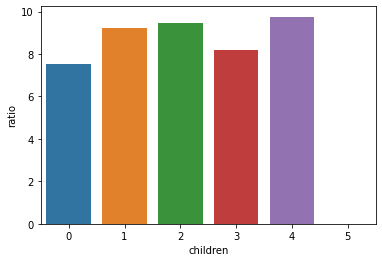

In [22]:
import seaborn
data_pivot = data.pivot_table(index=['children'], values='debt', aggfunc={'count', 'sum'})
data_pivot['ratio'] = data_pivot['sum']/data_pivot['count']*100
display(data_pivot)
data_pivot = data_pivot.sort_values(by ='ratio', ascending = False)
display(seaborn.barplot(x=data_pivot.index, y=data_pivot['ratio']))
# Ваш код будет здесь. Вы можете создавать новые ячейки.

**Вывод:** Исследование показывает, что кредитные услуги в семьях с пятью детьми - достаточно редкое явление, но возврат кредита происходит всегда своевременно. Хуже всего возвращают кредит семьи, где один и двое детей. Наилучшим образом своевременный возврат кредита выглядит у семей, где детей нет. Возможно, это связано с меньшей финансовой нагрузкой, или большим свободным временем, потраченным на заработок.

#### 3.2 Есть ли зависимость между семейным положением и возвратом кредита в срок?

,count,sum,ratio
family_status,,,
Не женат / не замужем,2796,273,9.763948
в разводе,1189,84,7.064760
вдовец / вдова,951,63,6.624606
гражданский брак,4134,385,9.313014
женат / замужем,12261,927,7.560558


<AxesSubplot:xlabel='ratio', ylabel='family_status'>

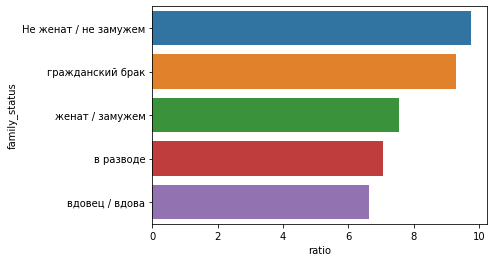

In [23]:
data_pivot = data.pivot_table(index=['family_status'], values='debt', aggfunc={'count', 'sum'})
data_pivot['ratio'] = data_pivot['sum']/data_pivot['count']*100
display(data_pivot)
data_pivot = data_pivot.sort_values(by ='ratio', ascending = False)
display(seaborn.barplot(x=data_pivot['ratio'], y=data_pivot.index))# Ваш код будет здесь. Вы можете создавать новые ячейки.

**Вывод:** Можно отметить, что заёмщики, состоящие в браке или находящиеся в разводе, своевременно возвращают кредит чаще, чем те, кто не замужем/не женат, или в гражданском браке. Вероятно, это обусловленно большим уровнем ответственности. Вдовы/вдовцы чаще всех возвращают кредит в срок, но и кредитом пользуются значительно реже.

#### 3.3 Есть ли зависимость между уровнем дохода и возвратом кредита в срок?

,count,sum,ratio,income
total_income_category,,,,
A,25,2,8.000000,>1000001
B,5014,354,7.060231,200001–1000000
C,15921,1353,8.498210,50001–200000
D,349,21,6.017192,30001–50000
E,22,2,9.090909,0–30000


<AxesSubplot:xlabel='total_income_category', ylabel='ratio'>

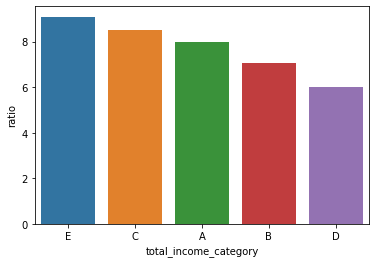

In [24]:
data_pivot = data.pivot_table(index=['total_income_category'], values='debt', aggfunc={'count', 'sum'})
data_pivot['ratio'] = data_pivot['sum']/data_pivot['count']*100
data_pivot['income'] = [">1000001", "200001–1000000", "50001–200000", "30001–50000", "0–30000"]
display(data_pivot)
data_pivot = data_pivot.sort_values(by ='ratio', ascending = False)
display(seaborn.barplot(x=data_pivot.index, y=data_pivot['ratio']))
# Ваш код будет здесь. Вы можете создавать новые ячейки.

**Вывод:** Люди, которые имеют доход от 50001 до 200000, берут кредит чаще всего и возвращают своевременно тоже чаще, чем, например, те, чей доход ниже 30000. Лучше всего возвращают кредит люди с уровнем дохода от 30001 до 50000. Те, чей доход  составляет более 1000001 и менее 30000 - достаточно редко пользуются кредитом.

#### 3.4 Как разные цели кредита влияют на его возврат в срок?

,count,sum,ratio
purpose_category,,,
операции с автомобилем,4279,400,9.347978
операции с недвижимостью,10751,780,7.255139
получение образования,3988,369,9.252758
проведение свадьбы,2313,183,7.911803


<AxesSubplot:xlabel='ratio', ylabel='purpose_category'>

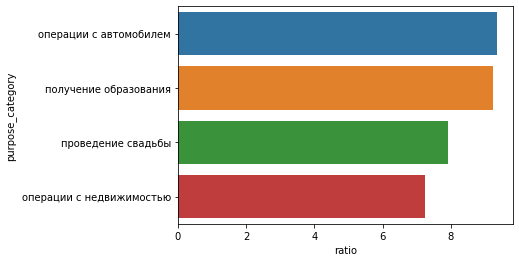

In [25]:
data_pivot = data.pivot_table(index=['purpose_category'], values='debt', aggfunc={'count', 'sum'})
data_pivot['ratio'] = data_pivot['sum']/data_pivot['count']*100
display(data_pivot)
data_pivot = data_pivot.sort_values(by ='ratio', ascending = False)
display(seaborn.barplot(x=data_pivot['ratio'], y=data_pivot.index))# Ваш код будет здесь. Вы можете создавать новые ячейки.

**Вывод:**Операции с недвижимостью лидируют по числу своевременных возвратов. Скорее всего, это связано с тем, что люди берут кредит на жильё, в котором живут, и не хотят сталкиваться с трудностями в этом. Те кредиты, которые взяты с целью проведения свадьбы, близки по показателю возврата кредита для операций с недвижимостью. Тут может влиять дополнительная ответственность, обусловленная семейным положением. Кредиты, взятые на учёбу и операции с автомобилем, показывают больший показатель просроченного возврата: 9,3% и 9.4%. Кредитный автомобиль, как правило, находится в залоге у банка - это может влиять на чувство ответственности дебитора. Совмещение учёбы с работой может сказаться на финансовом положении заёмщика.

#### 3.5 Приведём возможные причины появления пропусков в исходных данных.

*Ответ:* Пропуски данных совпадают по колонкам "days_employed"(общий трудовой стаж в днях) и "total_income"(ежемесячный доход). Возможной причиной может быть, например, если дебитор не работает официально, или неработающий пенсионер, или госслужащий, который не указывает по какой-то причине свой доход. Встречаются пропуски в разных категориях типа занятости, поэтому можно предположить, что данные некорректно внесены или плохо выгружены.

#### 3.6 Объясним, почему заполнить пропуски медианным значением — лучшее решение для количественных переменных.

*Ответ:* Медианное значение имеет более объективную информацию и не изменит общую картину, потому что всегда находится в середине: все элементы до значения - меньше, а все элементы после значения - больше.

### Шаг 4: общий вывод.

Целью исследования было разобраться, как влияют разные факторы на погашение кредита в срок. Использовалась статистика о платежеспособности клиентов, предоставленная банком.
В процессе исследования были рассмотрены следующие факторы: 

- Зависимость между наличием детей
- Зависимость между семейным положением
- Зависимость между уровнем дохода
- Зависимость от цели кредита

В результате исследования удалось выявить следующее:

**Зависимость между наличием детей**


7.6% доля просроченного возврата кредита у заёмщиков без детей

9.2% доля просроченного возврата кредита у заёмщиков с одним ребёнком

9.5% доля просроченного возврата кредита у заёмщиков с двумя детьми

С увеличением количества детей в семьях заёмщиков доля просроченных кредитов становится больше, но для более точных выводов по заёмщикам с более чем двумя детьми нужно больше данных.

**Зависимость между семейным положением**

Более низкие показатели просрочки платежа по кредиту у заёмщиков, состоящих в браке (7.6%), находящиеся в разводе (7.1%) и вдов/вдовцов (6.6%).

Заёмщики, не зарегистрированные официально (9.3%) и не женатые/не замужем (9.8%) с большей вероятностью не вернут кредит в срок.

Нельзя сказать, что разница кардинальная, но 3% на больших числах могут оказать существенное влияние на кредитный портфель банка.

**Зависимость между уровнем дохода**

8.5% доля просроченного возврата кредита у заёмщиков с доходом от 50001 до 200000

7.1% доля просроченного возврата кредита у заёмщиков с доходом от 200001 до 1000000

Для более точных выводов по заёмщикам с доходом от 200001 и заёмщикам с доходом менее 50000 нужно больше данных

**Зависимость от цели кредита**

9.4% доля просроченного возврата кредита на операции с автомобилем

9.3% доля просроченного возврата кредита на операции с образованием

7.9% доля просроченного возврата кредита на проведение свадьбы

7.3% доля просроченного возврата кредита на операции с недвижимостью

Здесь тоже нельзя увидеть кардинальных отличий, но 2% на больших числах могут оказать существенное влияние на кредитный портфель банка.

**Рекомендации банку**

- специалистам, которые занимаются построением модели кредитного скоринга можно использовать зависимости от семейного положения и зависимость от цели кредита
- уделить внимание правилам сбора информации так, чтобы исключить пропуски в данных по ежемесячному доходу
- собирать более полную выборку для повторных проверок зависимости между наличием детей и зависимости от уровня дохода 
